## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0715 20:51:40.150433 18156 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 20:51:40.173375 18156 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 20:51:40.179358 18156 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0715 20:51:46.118484 18156 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0715 20:51:46.130450 18156 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0715 20:52:11.399983 18156 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0715 20:52:11.467802 18156 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 167us/step - loss: 2.2645 - acc: 0.1508 - val_loss: 2.2034 - val_acc: 0.2070
Epoch 2/500
50000/50000 [==============================] - 8s 160us/step - loss: 2.1691 - acc: 0.2270 - val_loss: 2.1333 - val_acc: 0.2521
Epoch 3/500
50000/50000 [==============================] - 8s 160us/step - loss: 2.1092 - acc: 0.2608 - val_loss: 2.0811 - val_acc: 0.2724
Epoch 4/500
50000/50000 [==============================] - 8s 167us/step - loss: 2.0632 - acc: 0.2802 - val_loss: 2.0408 - val_acc: 0.2906
Epoch 5/500
50000/50000 [==============================] - 8s 157us/step - loss: 2.0267 - acc: 0.2944 - val_loss: 2.0084 - val_acc: 0.3033
Epoch 6/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.9969 - acc: 0.3041 - val_loss: 1.9811 - val_acc: 0.3149
Epoch 7/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.9716 - acc: 0.3137 - val_loss: 1.

50000/50000 [==============================] - 9s 173us/step - loss: 1.6522 - acc: 0.4255 - val_loss: 1.6575 - val_acc: 0.4223
Epoch 60/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.6492 - acc: 0.4253 - val_loss: 1.6537 - val_acc: 0.4251
Epoch 61/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.6463 - acc: 0.4263 - val_loss: 1.6504 - val_acc: 0.4236
Epoch 62/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.6433 - acc: 0.4277 - val_loss: 1.6480 - val_acc: 0.4265
Epoch 63/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.6405 - acc: 0.4286 - val_loss: 1.6484 - val_acc: 0.4221
Epoch 64/500
50000/50000 [==============================] - 10s 209us/step - loss: 1.6376 - acc: 0.4290 - val_loss: 1.6424 - val_acc: 0.4275
Epoch 65/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.6349 - acc: 0.4302 - val_loss: 1.6427 - val_acc: 0.4229
Epoch 66/500
50000/50000 [======

50000/50000 [==============================] - 8s 169us/step - loss: 1.5193 - acc: 0.4704 - val_loss: 1.5467 - val_acc: 0.4567
Epoch 118/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.5180 - acc: 0.4714 - val_loss: 1.5410 - val_acc: 0.4592
Epoch 119/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.5159 - acc: 0.4718 - val_loss: 1.5420 - val_acc: 0.4578
Epoch 120/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.5140 - acc: 0.4728 - val_loss: 1.5396 - val_acc: 0.4586
Epoch 121/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.5123 - acc: 0.4732 - val_loss: 1.5408 - val_acc: 0.4555
Epoch 122/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.5107 - acc: 0.4745 - val_loss: 1.5361 - val_acc: 0.4618
Epoch 123/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.5089 - acc: 0.4738 - val_loss: 1.5351 - val_acc: 0.4607
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 15s 304us/step - loss: 1.4255 - acc: 0.5014 - val_loss: 1.4754 - val_acc: 0.4794
Epoch 176/500
50000/50000 [==============================] - 15s 302us/step - loss: 1.4231 - acc: 0.5034 - val_loss: 1.4746 - val_acc: 0.4808
Epoch 177/500
50000/50000 [==============================] - 15s 306us/step - loss: 1.4220 - acc: 0.5024 - val_loss: 1.4683 - val_acc: 0.4841
Epoch 178/500
50000/50000 [==============================] - 15s 306us/step - loss: 1.4205 - acc: 0.5044 - val_loss: 1.4715 - val_acc: 0.4833
Epoch 179/500
50000/50000 [==============================] - 15s 295us/step - loss: 1.4191 - acc: 0.5053 - val_loss: 1.4742 - val_acc: 0.4808
Epoch 180/500
50000/50000 [==============================] - 15s 296us/step - loss: 1.4177 - acc: 0.5040 - val_loss: 1.4745 - val_acc: 0.4810
Epoch 181/500
50000/50000 [==============================] - 15s 293us/step - loss: 1.4160 - acc: 0.5055 - val_loss: 1.4709 - val_acc: 0.4775
Epoch 182/500
50000/

Epoch 233/500
50000/50000 [==============================] - 15s 298us/step - loss: 1.3438 - acc: 0.5305 - val_loss: 1.4225 - val_acc: 0.4964
Epoch 234/500
50000/50000 [==============================] - 15s 298us/step - loss: 1.3419 - acc: 0.5314 - val_loss: 1.4230 - val_acc: 0.4941
Epoch 235/500
50000/50000 [==============================] - 15s 301us/step - loss: 1.3410 - acc: 0.5297 - val_loss: 1.4197 - val_acc: 0.5012
Epoch 236/500
50000/50000 [==============================] - 15s 295us/step - loss: 1.3397 - acc: 0.5292 - val_loss: 1.4197 - val_acc: 0.4996
Epoch 237/500
50000/50000 [==============================] - 15s 296us/step - loss: 1.3382 - acc: 0.5319 - val_loss: 1.4349 - val_acc: 0.4938
Epoch 238/500
50000/50000 [==============================] - 15s 299us/step - loss: 1.3373 - acc: 0.5332 - val_loss: 1.4153 - val_acc: 0.5008
Epoch 239/500
50000/50000 [==============================] - 15s 300us/step - loss: 1.3355 - acc: 0.5325 - val_loss: 1.4180 - val_acc: 0.4956
Epoch 

Epoch 291/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.2726 - acc: 0.5528 - val_loss: 1.3857 - val_acc: 0.5142
Epoch 292/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.2705 - acc: 0.5550 - val_loss: 1.3976 - val_acc: 0.5067
Epoch 293/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.2697 - acc: 0.5546 - val_loss: 1.3831 - val_acc: 0.5136
Epoch 294/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.2672 - acc: 0.5559 - val_loss: 1.4006 - val_acc: 0.5085
Epoch 295/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.2662 - acc: 0.5553 - val_loss: 1.3915 - val_acc: 0.5113
Epoch 296/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.2658 - acc: 0.5563 - val_loss: 1.3871 - val_acc: 0.5165
Epoch 297/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.2645 - acc: 0.5580 - val_loss: 1.3783 - val_acc: 0.5136
Epoch 298/500

50000/50000 [==============================] - 8s 168us/step - loss: 1.2047 - acc: 0.5775 - val_loss: 1.3689 - val_acc: 0.5218
Epoch 350/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.2038 - acc: 0.5769 - val_loss: 1.3739 - val_acc: 0.5100
Epoch 351/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.2039 - acc: 0.5786 - val_loss: 1.3565 - val_acc: 0.5200
Epoch 352/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.2014 - acc: 0.5798 - val_loss: 1.3831 - val_acc: 0.5135
Epoch 353/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.2008 - acc: 0.5788 - val_loss: 1.3603 - val_acc: 0.5219
Epoch 354/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.1987 - acc: 0.5807 - val_loss: 1.3684 - val_acc: 0.5151
Epoch 355/500
50000/50000 [==============================] - 9s 170us/step - loss: 1.1985 - acc: 0.5804 - val_loss: 1.3606 - val_acc: 0.5218
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 8s 161us/step - loss: 1.1436 - acc: 0.5997 - val_loss: 1.3774 - val_acc: 0.5103
Epoch 408/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.1425 - acc: 0.5994 - val_loss: 1.3551 - val_acc: 0.5190
Epoch 409/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.1409 - acc: 0.6004 - val_loss: 1.3540 - val_acc: 0.5243
Epoch 410/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.1403 - acc: 0.5998 - val_loss: 1.3455 - val_acc: 0.5282
Epoch 411/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.1414 - acc: 0.6008 - val_loss: 1.3794 - val_acc: 0.5204
Epoch 412/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.1391 - acc: 0.6019 - val_loss: 1.3643 - val_acc: 0.5247
Epoch 413/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.1367 - acc: 0.6022 - val_loss: 1.3663 - val_acc: 0.5165
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 9s 180us/step - loss: 1.0841 - acc: 0.6204 - val_loss: 1.3365 - val_acc: 0.5310
Epoch 466/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.0827 - acc: 0.6211 - val_loss: 1.3567 - val_acc: 0.5263
Epoch 467/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.0811 - acc: 0.6227 - val_loss: 1.3390 - val_acc: 0.5331
Epoch 468/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.0805 - acc: 0.6207 - val_loss: 1.3743 - val_acc: 0.5168
Epoch 469/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.0795 - acc: 0.6227 - val_loss: 1.3342 - val_acc: 0.5285
Epoch 470/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.0805 - acc: 0.6229 - val_loss: 1.3501 - val_acc: 0.5317
Epoch 471/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.0780 - acc: 0.6227 - val_loss: 1.3625 - val_acc: 0.5220
Epoch 472/500
50000/50000 [

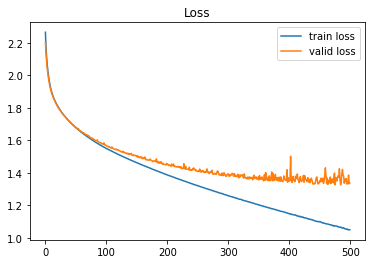

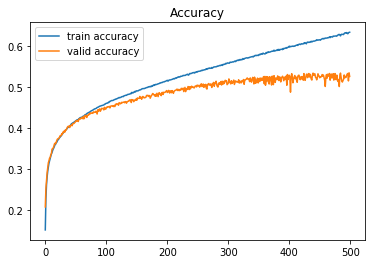

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()